<a href="https://colab.research.google.com/github/Soumya-Sri-Mutyala/Articial-Intelligence/blob/main/Padding_and_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

np.random.seed(1)

### Zero Padding

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1, 1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1, 1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


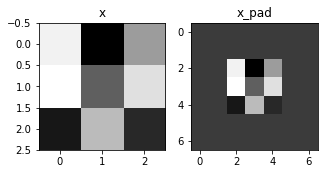

In [ ]:
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
    return X_pad

np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print("x.shape =", x.shape)
print("x_pad.shape =", x_pad.shape)
print("x[1, 1] =", x[1, 1])
print("x_pad[1, 1] =", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters['stride']
    pad = hparameters['pad']
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    Z = np.zeros((m, n_H, n_W, n_C))
    A_prev_pad = zero_pad(A_prev, pad)
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[...,c], b[...,c])
                    assert(Z.shape == (m, n_H, n_W, n_C))
                    cache = (A_Prev, W, b, hparameters)
                    return Z, cache

In [ ]:
def conv_single_step(a_slice_prev, W, b):
    s = np.multiply(a_slice_prev, W) + b
    Z = np.sum(s)
    return Z

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    f = hparameters["f"]
    stride = hparameters["stride"]
    n_H = int(1 + (n_H_prev - f)/ stride)
    n_W = int(1 + (n_W_prev - f)/ stride)
    n_C = n_C_prev
    A = np.zeros((m, n_H, n_W, n_C))
    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    cache = (A_prev, hparameters)
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache
                    

In [ ]:
def relu(A_prev):
    A_prev=np.maximum(0,A_prev)
    return A_prev   

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 1, "f": 4}
A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]]

mode = average
A = [[[[-0.09498456  0.11180064 -0.14263511]]]


 [[[-0.09525108  0.28325018  0.33035185]]]]


In [ ]:
for i in range(2):
    np.random.seed(1)
    A_prev = np.random.randn(10, 4, 4, 3)
    W = np.random.randn(2, 2, 3, 8)
    b = np.random.randn(1, 1, 1, 8)
    hparameters = {"pad" : 2,
                  "stride" : 1}
    Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
    print(str(i+1)+" time")
    print("Z's mean =", np.mean(Z))
    print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])
    A_prev=relu(A_prev)
    hparameters = {"stride" : 1, "f" : 4}
    
    A, cache= pool_forward(A_prev, hparameters)
    print(str(i+1)+" time")
    print('A =', A)

Number 1 time
Z's mean = 0.0011401740352391095
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]
Number 1 time
A = [[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]


 [[[1.96710175 1.12141771 1.27375593]]]


 [[[2.19069973 2.52832571 1.33145711]]]


 [[[2.44936865 1.6169496  1.9560789 ]]]


 [[[1.39984394 2.05117344 1.81053491]]]


 [[[2.06578332 1.45142926 3.03085711]]]


 [[[0.92001793 2.13782807 1.83471763]]]


 [[[2.11060505 2.0546241  1.1157018 ]]]


 [[[1.04499441 1.78975468 1.86647138]]]]
Number 2 time
Z's mean = 0.0011401740352391095
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]
Number 2 time
A = [[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]


 [[[1.96710175 1.12141771 1.27375593]]]


 [[[2.19069973 2.52832571 1.33145711]]]


 [[[2.44936865 1.6169496  1.9560789 ]]]


 [[[1.39984394 2.05117344 1.81053491]]]


 [[[2.06578332 1.45142926 3.03085711]]]


 [[[0.92001793 2.13782807 1.834